In [125]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)


In [126]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [127]:

BASE = "../data/elliptic_bitcoin_dataset"

features = pd.read_csv(f"{BASE}/elliptic_txs_features.csv", header=None)
edges = pd.read_csv(f"{BASE}/elliptic_txs_edgelist.csv")
labels = pd.read_csv(f"{BASE}/elliptic_txs_classes.csv")

print(features.shape, edges.shape, labels.shape)


(203769, 167) (234355, 2) (203769, 2)


In [128]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [129]:
edges.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [130]:
labels.head()

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [131]:
# Elliptic schema: col0=txId, col1=time_step, rest=features
features = features.copy()
features = features.rename(columns={0: "txId", 1: "time_step"})

# rename the rest as engineered features
for c in features.columns:
    if isinstance(c, int) and c >= 2:
        features = features.rename(columns={c: f"f_{c-2}"})


In [132]:
labels = labels.copy()
labels["class"] = labels["class"].astype(str)

label_map = {"1": "illicit", "2": "licit"}
labels["class_name"] = labels["class"].map(label_map).fillna("unknown")
labels["class_name"].value_counts()


class_name
unknown    157205
licit       42019
illicit      4545
Name: count, dtype: int64

In [133]:
df = features.merge(labels[["txId", "class_name"]], on="txId", how="left")
df["class_name"] = df["class_name"].fillna("unknown")
df.head()

,txId,time_step,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,...,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,class_name
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,unknown
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,licit
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,unknown


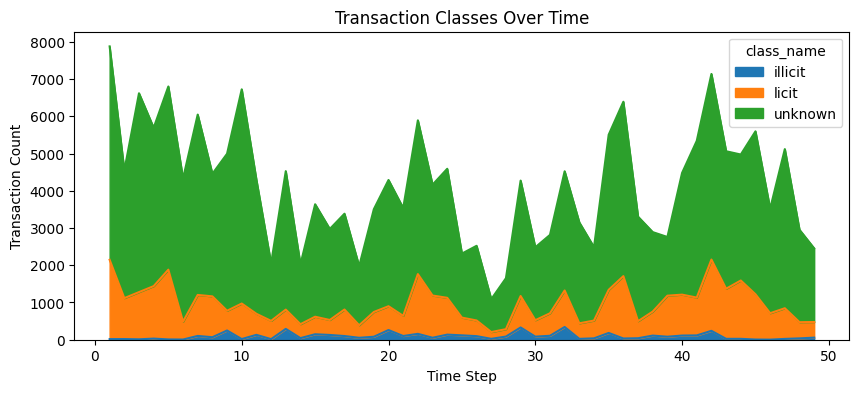

In [134]:
df_plot = df.reset_index(drop=True)

ct = pd.crosstab(df_plot["time_step"], df_plot["class_name"]).sort_index()

ct.plot(kind="area", stacked=True, figsize=(10,4))
plt.title("Transaction Classes Over Time")
plt.xlabel("Time Step")
plt.ylabel("Transaction Count")
plt.show()



In [135]:
features.head()

,txId,time_step,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,...,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


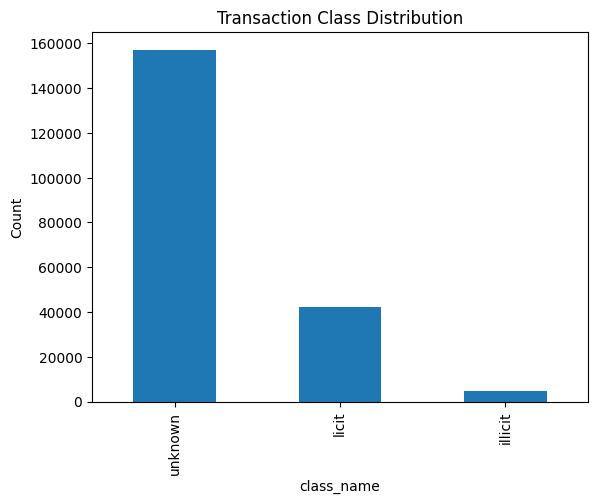

In [136]:
labels["class_name"].value_counts().plot(kind="bar")
plt.title("Transaction Class Distribution")
plt.ylabel("Count")
plt.show()


In [137]:
features.columns = [f"f_{i}" for i in range(features.shape[1])]
features.columns

Index(['f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9',
       ...
       'f_157', 'f_158', 'f_159', 'f_160', 'f_161', 'f_162', 'f_163', 'f_164',
       'f_165', 'f_166'],
      dtype='str', length=167)

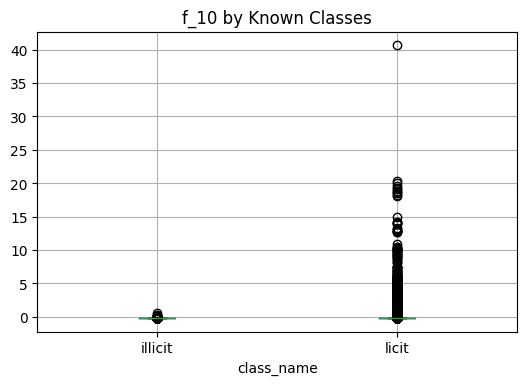

In [138]:
feature = "f_10" 

df_known = df[df["class_name"].isin(["illicit", "licit"])]

df_known.boxplot(column=feature, by="class_name", figsize=(6,4))
plt.title(f"{feature} by Known Classes")
plt.suptitle("")
plt.show()


In [139]:
edges.head()
edges.shape


(234355, 2)

In [140]:
edges['txId1'].value_counts().describe()


count    166345.000000
mean          1.408849
std           2.008279
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         472.000000
Name: count, dtype: float64

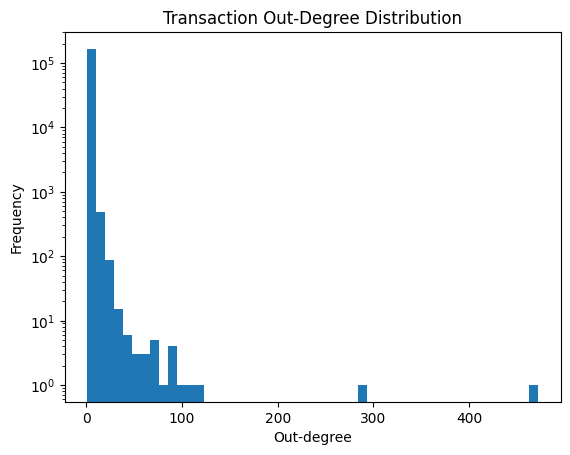

In [141]:
edges['txId1'].value_counts().plot(kind='hist', bins=50)
plt.title("Transaction Out-Degree Distribution")
plt.xlabel("Out-degree")
plt.ylabel("Frequency")
plt.yscale("log")
plt.show()


In [142]:
from src.features.transaction_features import add_fan_in_out

df_feat = add_fan_in_out(df, edges)
df_feat[["txId","fan_in_1hop","fan_out_1hop","class_name"]].head()
df_feat[["fan_in_1hop","fan_out_1hop"]].describe()


,fan_in_1hop,fan_out_1hop
count,203769.000000,203769.000000
mean,1.150101,1.150101
std,3.911132,1.894740
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,284.000000,472.000000


In [143]:
from src.features.transaction_features import add_fan_in_out, add_illicit_exposure

df_feat = add_fan_in_out(df, edges)
df_feat = add_illicit_exposure(df_feat, edges)

df_feat[[
    "fan_in_1hop","fan_out_1hop",
    "nbr_count_1hop","illicit_nbr_ratio_1hop",
    "nbr_count_2hop_strict","illicit_nbr_ratio_2hop_strict",
    "class_name"
]].head()


,fan_in_1hop,fan_out_1hop,nbr_count_1hop,illicit_nbr_ratio_1hop,nbr_count_2hop_strict,illicit_nbr_ratio_2hop_strict,class_name
0,1,1,2,0.000000,2,0.000000,unknown
1,1,1,2,0.000000,1,0.000000,unknown
2,1,2,3,0.000000,162,0.006173,unknown
3,160,1,161,0.006211,258,0.000000,licit
4,2,8,10,0.000000,17,0.000000,unknown


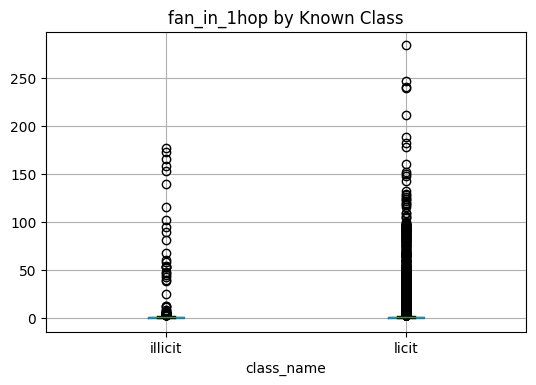

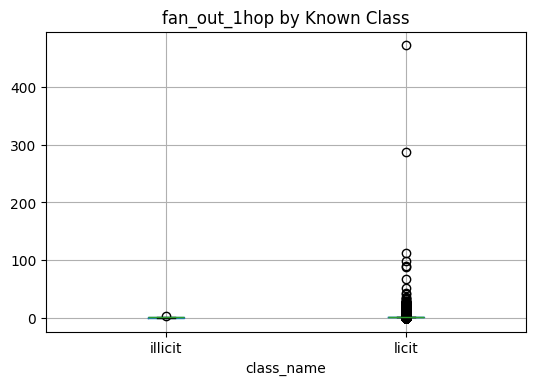

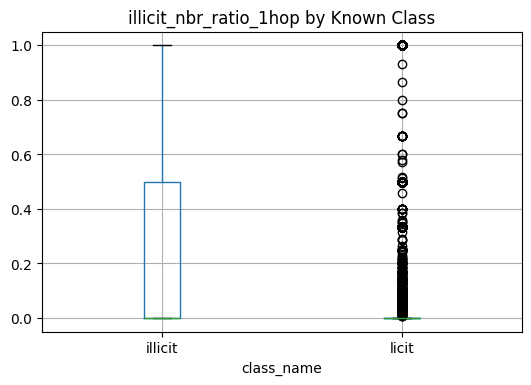

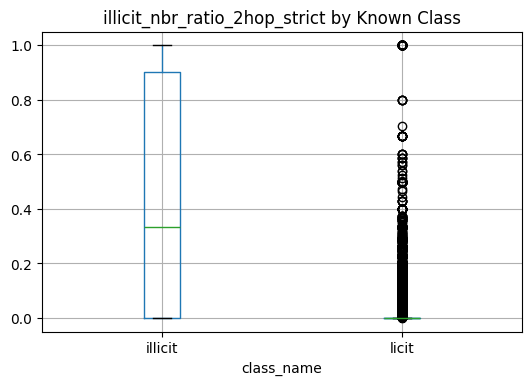

In [144]:
df_known = df_feat[df_feat["class_name"].isin(["illicit","licit"])]

for col in ["fan_in_1hop","fan_out_1hop","illicit_nbr_ratio_1hop","illicit_nbr_ratio_2hop_strict"]:
    df_known.boxplot(column=col, by="class_name", figsize=(6,4))
    plt.title(f"{col} by Known Class")
    plt.suptitle("")
    plt.show()


In [145]:
df_small = df_feat.sample(20000, random_state=42)
df_small = add_illicit_exposure(df_small, edges, compute_2hop=True)


In [146]:
df_feat[["fan_in_1hop","fan_out_1hop"]].describe()

,fan_in_1hop,fan_out_1hop
count,203769.000000,203769.000000
mean,1.150101,1.150101
std,3.911132,1.894740
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,284.000000,472.000000


In [147]:
df_feat[["illicit_nbr_ratio_1hop","illicit_nbr_ratio_2hop_strict"]].describe()

,illicit_nbr_ratio_1hop,illicit_nbr_ratio_2hop_strict
count,203769.000000,203769.000000
mean,0.020087,0.020682
std,0.124804,0.110912
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [148]:
from src.risk.risk_rules import compute_risk_score

scores = df_feat.apply(compute_risk_score, axis=1, result_type="expand")
df_feat["risk_score"] = scores[0]
df_feat["alert_reasons"] = scores[1]


In [149]:
df_feat["risk_score"].describe()
df_feat[df_feat["risk_score"] >= 4][
    ["txId","risk_score","alert_reasons","class_name"]
].head(10)


,txId,risk_score,alert_reasons,class_name
20654,86591439,4,"[Direct exposure to illicit transactions, Indi...",unknown
20655,279424082,4,"[Direct exposure to illicit transactions, Indi...",illicit
22745,5464914,4,"[Direct exposure to illicit transactions, Indi...",unknown
22892,86589151,4,"[Direct exposure to illicit transactions, Indi...",unknown
24426,87608054,4,"[Direct exposure to illicit transactions, Indi...",unknown
36226,94167767,4,"[Direct exposure to illicit transactions, Indi...",illicit
36227,94324993,4,"[Direct exposure to illicit transactions, Indi...",illicit
36509,94654151,5,"[High transaction fan-in, Direct exposure to i...",unknown
36925,94658603,4,"[Direct exposure to illicit transactions, Indi...",illicit
36926,84370891,4,"[Direct exposure to illicit transactions, Indi...",illicit


In [150]:
from src.risk.risk_scoring import fit_risk_config, add_risk_scores, get_alerts

# Fit thresholds (use known labels only so thresholds aren't dominated by "unknown")
cfg = fit_risk_config(df_feat, use_known_only=True)

cfg

RiskConfig(fan_out_p99=6.370000000002619, fan_out_p95=2.0, fan_in_p99=25.0, fan_in_p95=5.0, exp1_p99=1.0, exp1_p95=0.043478260869565216, exp2_p99=1.0, exp2_p95=0.375)

In [151]:
df_scored = add_risk_scores(df_feat, cfg)

df_scored["severity"].value_counts()
df_scored["risk_score"].describe()


count    203769.000000
mean          0.406583
std           0.958894
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           9.000000
Name: risk_score, dtype: float64

In [152]:
alerts = get_alerts(df_scored, min_severity="medium")
alerts.head(10)


,txId,time_step,class_name,risk_score,severity,fan_in_1hop,fan_out_1hop,nbr_count_1hop,illicit_nbr_count_1hop,nbr_count_2hop_strict,illicit_nbr_count_2hop_strict,illicit_nbr_ratio_1hop,illicit_nbr_ratio_2hop_strict,alert_reasons
118575,123702356,29,unknown,9,critical,5,0,5,5,1,1,1.0,1.0,[Direct illicit exposure extremely high (1-hop...
108961,277013200,25,unknown,9,critical,6,0,6,6,1,1,1.0,1.0,[Direct illicit exposure extremely high (1-hop...
117240,167748861,29,illicit,8,critical,1,1,2,2,2,2,1.0,1.0,[Direct illicit exposure extremely high (1-hop...
93664,99258538,21,illicit,8,critical,0,1,1,1,4,4,1.0,1.0,[Direct illicit exposure extremely high (1-hop...
104873,272077543,24,illicit,8,critical,1,1,2,2,2,2,1.0,1.0,[Direct illicit exposure extremely high (1-hop...
104874,272077542,24,illicit,8,critical,1,1,2,2,2,2,1.0,1.0,[Direct illicit exposure extremely high (1-hop...
104564,205854860,24,illicit,8,critical,1,1,2,2,2,2,1.0,1.0,[Direct illicit exposure extremely high (1-hop...
104565,57167035,24,illicit,8,critical,1,1,2,2,2,2,1.0,1.0,[Direct illicit exposure extremely high (1-hop...
104584,60868547,24,illicit,8,critical,0,1,1,1,1,1,1.0,1.0,[Direct illicit exposure extremely high (1-hop...
104585,295553950,24,illicit,8,critical,1,1,2,2,1,1,1.0,1.0,[Direct illicit exposure extremely high (1-hop...


In [153]:
known = df_scored[df_scored["class_name"].isin(["illicit", "licit"])].copy()

pd.crosstab(known["severity"], known["class_name"], normalize="index")


class_name,illicit,licit
severity,,
critical,0.946292,0.053708
high,0.651118,0.348882
low,0.061792,0.938208
medium,0.524580,0.475420


In [154]:
alerts[["txId", "class_name", "risk_score", "severity", "alert_reasons"]].head(20)


,txId,class_name,risk_score,severity,alert_reasons
118575,123702356,unknown,9,critical,[Direct illicit exposure extremely high (1-hop...
108961,277013200,unknown,9,critical,[Direct illicit exposure extremely high (1-hop...
117240,167748861,illicit,8,critical,[Direct illicit exposure extremely high (1-hop...
93664,99258538,illicit,8,critical,[Direct illicit exposure extremely high (1-hop...
104873,272077543,illicit,8,critical,[Direct illicit exposure extremely high (1-hop...
104874,272077542,illicit,8,critical,[Direct illicit exposure extremely high (1-hop...
104564,205854860,illicit,8,critical,[Direct illicit exposure extremely high (1-hop...
104565,57167035,illicit,8,critical,[Direct illicit exposure extremely high (1-hop...
104584,60868547,illicit,8,critical,[Direct illicit exposure extremely high (1-hop...
104585,295553950,illicit,8,critical,[Direct illicit exposure extremely high (1-hop...


In [155]:
df_scored["severity"].value_counts()

severity
low         196013
medium        4492
high          2817
critical       447
Name: count, dtype: int64

In [156]:
alerts[["txId","class_name","risk_score","severity","alert_reasons"]]

,txId,class_name,risk_score,severity,alert_reasons
118575,123702356,unknown,9,critical,[Direct illicit exposure extremely high (1-hop...
108961,277013200,unknown,9,critical,[Direct illicit exposure extremely high (1-hop...
117240,167748861,illicit,8,critical,[Direct illicit exposure extremely high (1-hop...
93664,99258538,illicit,8,critical,[Direct illicit exposure extremely high (1-hop...
104873,272077543,illicit,8,critical,[Direct illicit exposure extremely high (1-hop...
...,...,...,...,...,...
8171,309974683,unknown,3,medium,"[Extreme fan-out (out-degree=9), High fan-in (..."
8058,242515951,unknown,3,medium,"[Extreme fan-out (out-degree=7), High fan-in (..."
8034,309959486,unknown,3,medium,"[Extreme fan-out (out-degree=12), High fan-in ..."
8015,302742245,unknown,3,medium,"[Extreme fan-out (out-degree=10), High fan-in ..."


In [157]:
alerts["alert_id"] = (
    "ALERT-" + alerts.index.astype(str).str.zfill(4)
)

In [158]:
import matplotlib.pyplot as plt

def plot_exposure_ratios(payload: dict):
    r1 = payload.get("illicit_nbr_ratio_1hop")
    r2 = payload.get("illicit_nbr_ratio_2hop_strict")

    labels = []
    values = []

    if r1 is not None:
        labels.append("1-hop exposure ratio")
        values.append(r1)
    if r2 is not None:
        labels.append("2-hop strict exposure ratio")
        values.append(r2)

    plt.figure()
    plt.bar(labels, values)
    plt.ylim(0, 1.05)
    plt.ylabel("Ratio")
    plt.title(f"Exposure ratios for txId={payload.get('txId')}")
    plt.tight_layout()
    plt.show()


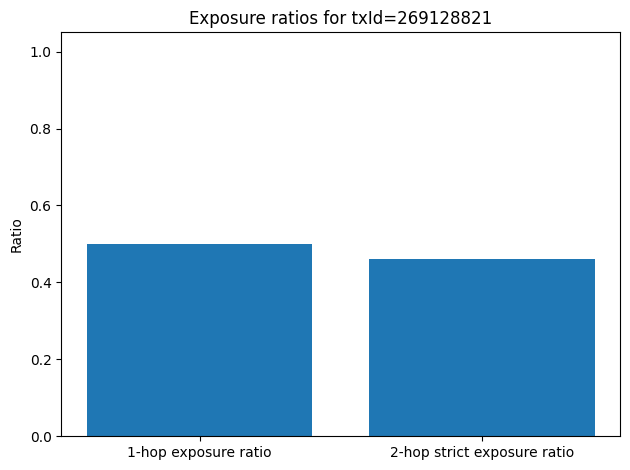

{'alert_id': 'ALERT-109745', 'txId': '269128821', 'severity': 'high', 'risk_score': 6, 'executive_summary': 'The transaction exhibits significant risk signals due to elevated direct and indirect illicit exposure ratios, alongside a high fan-out in its 1-hop neighborhood. The analysis indicates a concerning proximity to labeled illicit nodes in the dataset.', 'why_flagged': ['Direct illicit exposure elevated (1-hop ratio=0.500)', 'Indirect illicit exposure elevated (2-hop ratio=0.462)', 'High fan-out (out-degree=3)'], 'likely_typologies': ['unknown'], 'recommended_next_steps': ['Review top illicit-linked 1-hop neighbors contributing to exposure', 'Review top illicit-linked strict 2-hop neighbors contributing to exposure', 'Check whether exposure is concentrated in a single neighbor vs distributed'], 'evidence': [{'field': 'illicit_neighbors_1hop', 'value': 2, 'note': 'Count of illicit neighbors in 1-hop neighborhood.'}, {'field': 'illicit_neighbors_2hop_strict', 'value': 6, 'note': 'Cou

In [159]:
from src.llm.investigator import build_alert_payload, investigate_alert

# Select one scored alert
row = alerts.iloc[841]

# Build structured payload (deterministic, model-agnostic)
payload = build_alert_payload(row.to_dict())

# Generate investigation report (LLM explainability layer)
report = investigate_alert(payload, model="gpt-4o-mini")
plot_exposure_ratios(payload)
print(report)




In [160]:
from IPython.display import display, Markdown
import pandas as pd

def display_investigation_report(report: dict):
    # Header
    header = f"""
### 🚨 Investigation Report: {report.get('alert_id','(no id)')}
- **txId:** `{report.get('txId')}`
- **Severity:** **{report.get('severity')}**
- **Risk score:** **{report.get('risk_score')}**
- **Confidence:** **{report.get('confidence')}**
"""
    display(Markdown(header))

    # Executive summary
    display(Markdown(f"#### Executive Summary\n{report.get('executive_summary','')}"))

    # Why flagged
    why = report.get("why_flagged", [])
    if why:
        display(Markdown("#### Why Flagged"))
        display(Markdown("\n".join([f"- {x}" for x in why])))

    # Typologies
    typos = report.get("likely_typologies", [])
    if typos:
        display(Markdown("#### Possible Typologies"))
        display(Markdown(", ".join([f"`{t}`" for t in typos])))

    # Recommended next steps
    steps = report.get("recommended_next_steps", [])
    if steps:
        display(Markdown("#### Recommended Next Steps"))
        display(Markdown("\n".join([f"- {x}" for x in steps])))

    # Evidence table
    evidence = report.get("evidence", [])
    if evidence:
        display(Markdown("#### Evidence"))
        df_ev = pd.DataFrame(evidence)
        display(df_ev)

    # Confidence rationale + limitations
    cr = report.get("confidence_rationale")
    if cr:
        display(Markdown(f"#### Confidence Rationale\n{cr}"))

    lim = report.get("limitations", [])
    if lim:
        display(Markdown("#### Limitations"))
        display(Markdown("\n".join([f"- {x}" for x in lim])))

# Use it
display_investigation_report(report)



### 🚨 Investigation Report: ALERT-109745
- **txId:** `269128821`
- **Severity:** **high**
- **Risk score:** **6**
- **Confidence:** **medium**


#### Executive Summary
The transaction exhibits significant risk signals due to elevated direct and indirect illicit exposure ratios, alongside a high fan-out in its 1-hop neighborhood. The analysis indicates a concerning proximity to labeled illicit nodes in the dataset.

#### Why Flagged

- Direct illicit exposure elevated (1-hop ratio=0.500)
- Indirect illicit exposure elevated (2-hop ratio=0.462)
- High fan-out (out-degree=3)

#### Possible Typologies

`unknown`

#### Recommended Next Steps

- Review top illicit-linked 1-hop neighbors contributing to exposure
- Review top illicit-linked strict 2-hop neighbors contributing to exposure
- Check whether exposure is concentrated in a single neighbor vs distributed

#### Evidence

,field,value,note
0,illicit_neighbors_1hop,2.000000,Count of illicit neighbors in 1-hop neighborhood.
1,illicit_neighbors_2hop_strict,6.000000,Count of illicit neighbors in strict 2-hop nei...
2,illicit_nbr_ratio_1hop,0.500000,Ratio of illicit neighbors in 1-hop neighborhood.
3,illicit_nbr_ratio_2hop_strict,0.461538,Ratio of illicit neighbors in strict 2-hop nei...
4,total_neighbors_1hop,4.000000,Total neighbors in 1-hop neighborhood.
5,total_neighbors_2hop_strict,13.000000,Total neighbors in strict 2-hop neighborhood.


#### Confidence Rationale
Confidence in graph-label proximity is moderate due to the presence of labeled illicit nodes in both 1-hop and strict 2-hop neighborhoods. However, confidence in real-world attribution is low as specific amounts and entities are absent.

#### Limitations

- Counts of top illicit neighbors are unavailable.